In [1]:
import os
import time
import random
import numpy as np
import pandas as pd
import torch
from networks.TransBTS.TransBTS_downsample8x_skipconnection import TransBTS
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms

/home/zhemin/anaconda3/envs/vqvae_env/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/zhemin/anaconda3/envs/vqvae_env/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
device = torch.device(f"cuda:{0}" if torch.cuda.is_available() else "cpu")
print("DEVICE INFO:", device)
_, model_bts = TransBTS(dataset='breast', _conv_repr=True, _pe_type="learned")
checkpoint = torch.load('./checkpoint/TransBTS2024-04-10/model_epoch_last.pth')
model_bts.load_state_dict(checkpoint['state_dict'])
# model_bts = load_ckpt('./checkpoint/TransBTS2024-04-10/model_epoch_last.pth', model_bts)
# model_bts.to(device)
model_bts.eval()

DEVICE INFO: cuda:0


BTS(
  (linear_encoding): Linear(in_features=128, out_features=128, bias=True)
  (position_encoding): LearnedPositionalEncoding()
  (pe_dropout): Dropout(p=0.1, inplace=False)
  (transformer): TransformerModel(
    (net): IntermediateSequential(
      (0): Residual(
        (fn): PreNormDrop(
          (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (fn): SelfAttention(
            (qkv): Linear(in_features=128, out_features=384, bias=False)
            (attn_drop): Dropout(p=0.1, inplace=False)
            (proj): Linear(in_features=128, out_features=128, bias=True)
            (proj_drop): Dropout(p=0.1, inplace=False)
          )
        )
      )
      (1): Residual(
        (fn): PreNorm(
          (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (fn): FeedForward(
            (net): Sequential(
              (0): Linear(in_features=128, out_features=1024, bias=True)
              (1)

In [3]:
def img_process(path):
    img_in = Image.open(path)
    img_in = img_in.convert('L')
    img_in = np.array(img_in)
    img_norm = (((img_in-np.min(img_in))/(np.max(img_in)-np.min(img_in)))*255).astype(dtype='uint8')

    # img_norm = np.expand_dims(img_norm, axis=-1)
    transformations = transforms.Compose([transforms.ToTensor(), 
                                          transforms.Resize((256,256)),
                                        transforms.Normalize(mean=[0.5], std=[0.5])])
    resize_img = transformations(img_norm)
    resize_img = resize_img.to(torch.float32)
    resize_img = (resize_img+1)/2

    return resize_img

# RSNA

## normal

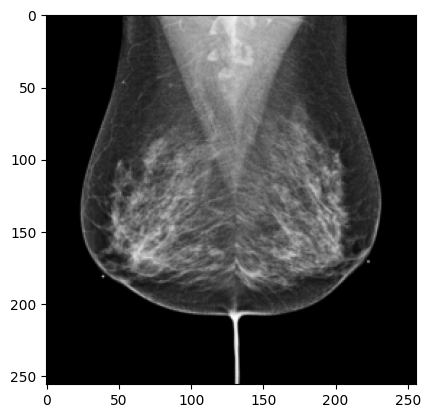

In [16]:
img_none = Image.open('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/0_id.png')
img_none = np.array(img_none)
plt.imshow(img_none, cmap='gray')

torch.Size([1, 256, 256])


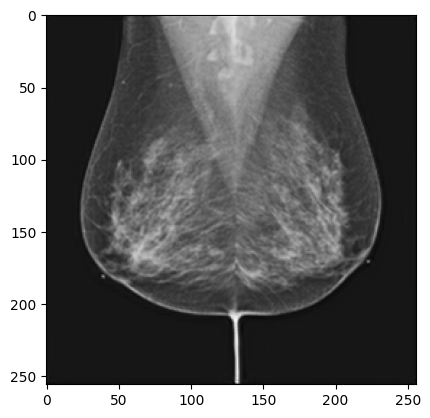

In [15]:
img_none = img_process('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/0_id.png')
recon_x = model_bts(img_none.unsqueeze(0))
print(recon_x.squeeze(0).shape)
recon_x_np = recon_x.squeeze(1).reshape([256, 256, 1]).detach().numpy()
plt.imshow(recon_x_np, cmap='gray')

## implant

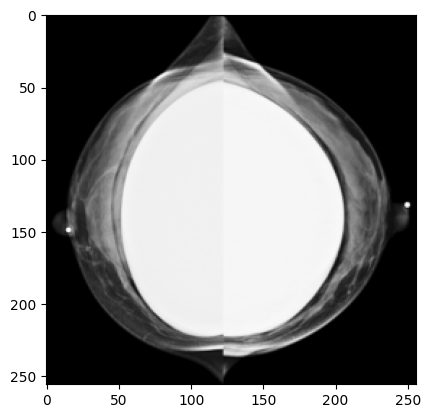

In [17]:
img = Image.open('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/1_implant.png')
img = np.array(img)
plt.imshow(img, cmap='gray')

torch.Size([1, 256, 256])


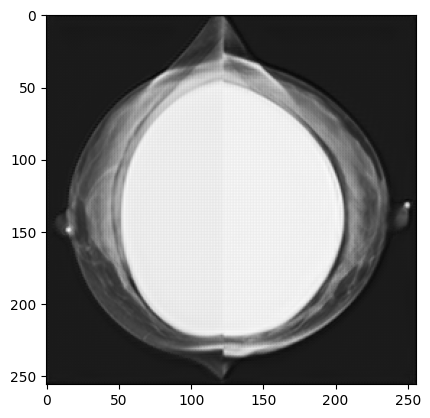

In [18]:
img_none = img_process('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/1_implant.png')
recon_x = model_bts(img_none.unsqueeze(0))
print(recon_x.squeeze(0).shape)
recon_x_np = recon_x.squeeze(1).reshape([256, 256, 1]).detach().numpy()
plt.imshow(recon_x_np, cmap='gray')

## salt and pepper

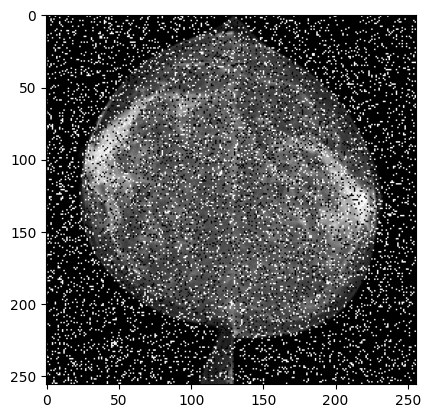

In [19]:
img = Image.open('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/2_sp.png')
img = np.array(img)
plt.imshow(img, cmap='gray')

torch.Size([1, 256, 256])


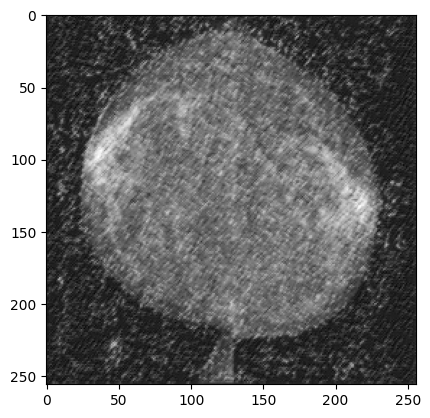

In [20]:
img_none = img_process('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/2_sp.png')
recon_x = model_bts(img_none.unsqueeze(0))
print(recon_x.squeeze(0).shape)
recon_x_np = recon_x.squeeze(1).reshape([256, 256, 1]).detach().numpy()
plt.imshow(recon_x_np, cmap='gray')

## distortion

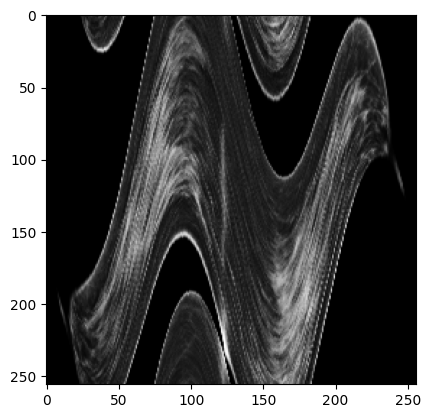

In [22]:
img = Image.open('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/3_distort.png')
img = np.array(img)
plt.imshow(img, cmap='gray')

torch.Size([1, 256, 256])


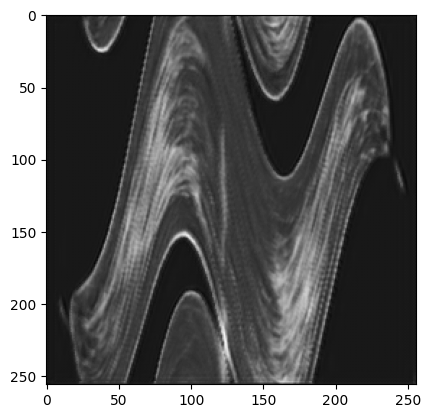

In [23]:
img_none = img_process('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/3_distort.png')
recon_x = model_bts(img_none.unsqueeze(0))
print(recon_x.squeeze(0).shape)
recon_x_np = recon_x.squeeze(1).reshape([256, 256, 1]).detach().numpy()
plt.imshow(recon_x_np, cmap='gray')

## gaussian

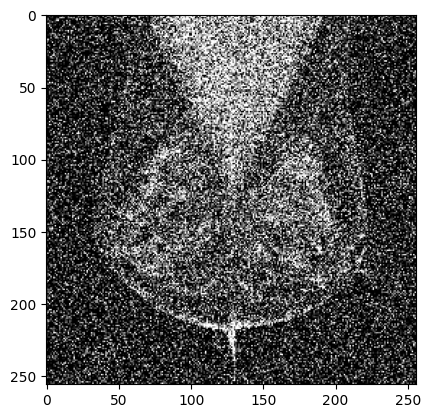

In [24]:
img = Image.open('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/4_gaussian.png')
img = np.array(img)
plt.imshow(img, cmap='gray')

torch.Size([1, 256, 256])


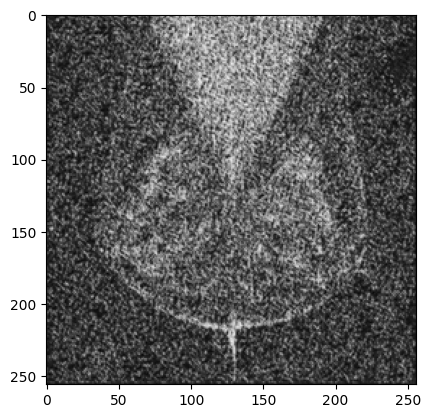

In [25]:
img_none = img_process('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/4_gaussian.png')
recon_x = model_bts(img_none.unsqueeze(0))
print(recon_x.squeeze(0).shape)
recon_x_np = recon_x.squeeze(1).reshape([256, 256, 1]).detach().numpy()
plt.imshow(recon_x_np, cmap='gray')

## bad quality

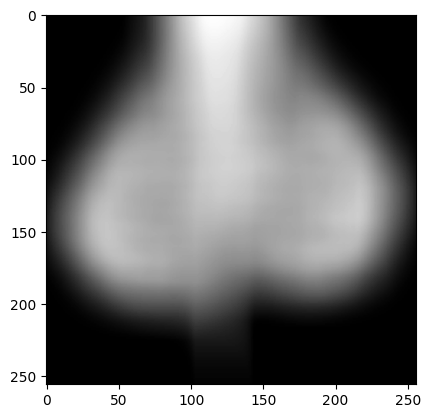

In [26]:
img = Image.open('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/5_poorRes.png')
img = np.array(img)
plt.imshow(img, cmap='gray')

torch.Size([1, 256, 256])


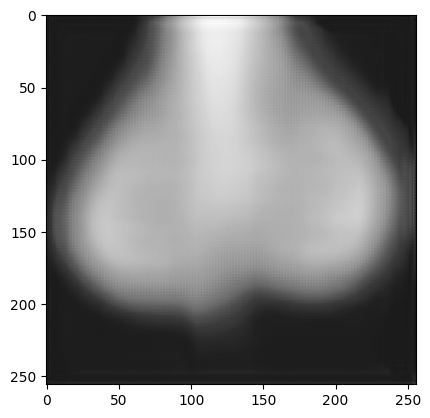

In [27]:
img_none = img_process('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/5_poorRes.png')
recon_x = model_bts(img_none.unsqueeze(0))
print(recon_x.squeeze(0).shape)
recon_x_np = recon_x.squeeze(1).reshape([256, 256, 1]).detach().numpy()
plt.imshow(recon_x_np, cmap='gray')

## natural

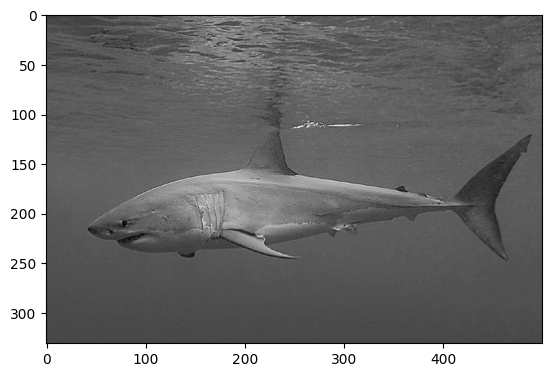

In [30]:
img = Image.open('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/6_natural.png')
img = np.array(img)
plt.imshow(img, cmap='gray')

/home/zhemin/anaconda3/envs/vqvae_env/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([1, 256, 256])
torch.Size([1, 256, 256])


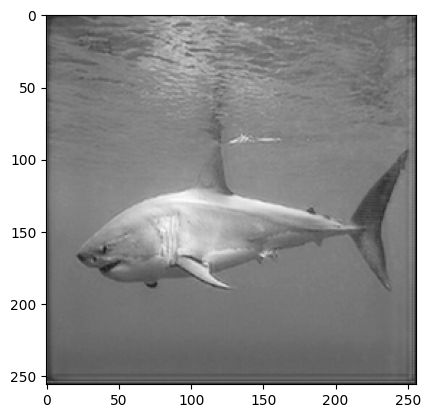

In [34]:
img_none = img_process('/home/zhemin/Datacenter_storage/zhemin/test_generation/test_png_recon/6_natural.png')
print(img_none.shape)
recon_x = model_bts(img_none.unsqueeze(0))
print(recon_x.squeeze(0).shape)
recon_x_np = recon_x.squeeze(1).reshape([256, 256, 1]).detach().numpy()
plt.imshow(recon_x_np, cmap='gray')

# Mayo

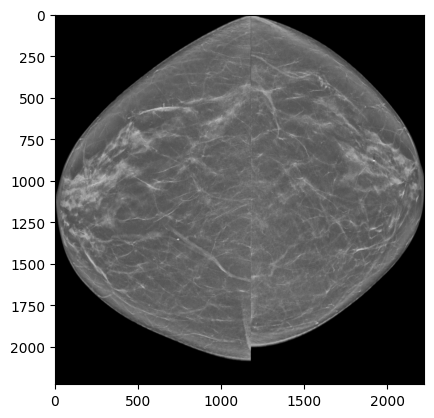

In [11]:
path = '/home/zhemin/Datacenter_storage/zhemin/test_generation/external/mayo_recon/3_qi.png'
img = Image.open(path)
img = np.array(img)
plt.imshow(img, cmap='gray')

torch.Size([1, 256, 256])
torch.Size([1, 256, 256])


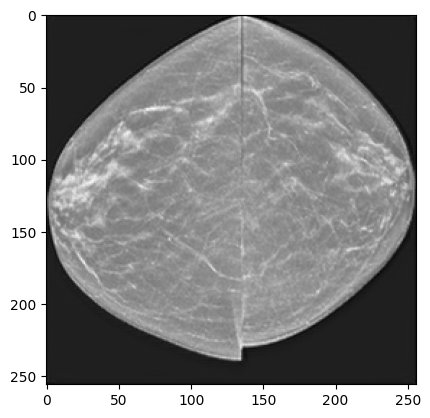

In [12]:
img = img_process(path)
print(img.shape)
recon_x = model_bts(img.unsqueeze(0))
print(recon_x.squeeze(0).shape)
recon_x_np = recon_x.squeeze(1).reshape([256, 256, 1]).detach().numpy()
plt.imshow(recon_x_np, cmap='gray')